In [66]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, StratifiedKFold, LeaveOneOut, KFold, RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import datasets
from sklearn.decomposition import PCA

# Ucitavanje dataset-ova

In [2]:
#    Feature name                         Values                 Mean ± SDa
#Response to treatment                   Yes or No
#Gender                                1- Man (47),
#                                      2- Woman (43)
#Age(year)                                15–67                  28.6 ± 13.36
#Time elapsed before treatment(month)      0–12                  7.66 ± 3.4
#The number of warts                       1–12                  5.51 ± 3.57
#Types of wart (Count)                 1- Common (54),
#                                      2- Plantar (9),
#                                      3- Both (27)
#Surface area of the wartsc(mm2)          4–750                85.83 ± 131.73
cryo = pd.read_excel('Cryotherapy.xlsx', 'CrayoDataset', index_col=None)
cryo.head()

,sex,age,Time,Number_of_Warts,Type,Area,Result_of_Treatment
0,1,35,12.00,5,1,100,0
1,1,29,7.00,5,1,96,1
2,1,50,8.00,1,3,132,0
3,1,32,11.75,7,3,750,0
4,1,67,9.25,1,1,42,0


In [3]:
#        Feature name                           Values                    Mean ± SD
# Response to treatment                        Yes or No
# Gender                                       1- Man (41),
#                                              2- Woman (49)
# Age (year)                                    15–56                    31.04 ± 12.23
# Time elapsed before treatment(month)           0–12                     7.23 ± 3.10
# The number of warts                            1–19                     6.14 ± 4.2
# Types of wart(Count)                        1– Common (47),
#                                             2– Plantar (22),
#                                             3– Both (21)
# Surface area of the wartsa(mm2)                6–900                    95.7 ± 136.61
# Induration diameter of initial test(mm)        5–70                    14.33 ± 17.22
immuno = pd.read_excel('Immunotherapy.xlsx', 'ImmunoDataset', index_col=None)
immuno.head()

,sex,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,1,22,2.25,14,3,51,50,1
1,1,15,3.00,2,3,900,70,1
2,1,16,10.50,2,1,100,25,1
3,1,27,4.50,9,3,80,30,1
4,1,20,8.00,6,1,45,8,1


# Analiza podataka

In [4]:
print(cryo.shape)
print(immuno.shape)

(90, 7)
(90, 8)


In [5]:
print("Cryo:")
print(cryo.info())

Cryo:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sex                  90 non-null     int64  
 1   age                  90 non-null     int64  
 2   Time                 90 non-null     float64
 3   Number_of_Warts      90 non-null     int64  
 4   Type                 90 non-null     int64  
 5   Area                 90 non-null     int64  
 6   Result_of_Treatment  90 non-null     int64  
dtypes: float64(1), int64(6)
memory usage: 5.0 KB
None


In [6]:
print("\nImmuno:")
print(immuno.info())


Immuno:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sex                  90 non-null     int64  
 1   age                  90 non-null     int64  
 2   Time                 90 non-null     float64
 3   Number_of_Warts      90 non-null     int64  
 4   Type                 90 non-null     int64  
 5   Area                 90 non-null     int64  
 6   induration_diameter  90 non-null     int64  
 7   Result_of_Treatment  90 non-null     int64  
dtypes: float64(1), int64(7)
memory usage: 5.8 KB
None


##### Postoje li nelogične/nevalidne vrednosti?

In [7]:
cryo.describe()

,sex,age,Time,Number_of_Warts,Type,Area,Result_of_Treatment
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,1.477778,28.600000,7.666667,5.511111,1.700000,85.833333,0.533333
std,0.502304,13.360852,3.406661,3.567155,0.905042,131.733153,0.501683
min,1.000000,15.000000,0.250000,1.000000,1.000000,4.000000,0.000000
25%,1.000000,18.000000,4.562500,2.000000,1.000000,20.000000,0.000000
50%,1.000000,25.500000,8.500000,5.000000,1.000000,70.000000,1.000000
75%,2.000000,35.000000,10.687500,8.000000,3.000000,100.000000,1.000000
max,2.000000,67.000000,12.000000,12.000000,3.000000,750.000000,1.000000


In [8]:
immuno.describe()

,sex,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,1.544444,31.044444,7.230556,6.144444,1.711111,95.700000,14.333333,0.788889
std,0.500811,12.235435,3.098166,4.212238,0.824409,136.614643,17.217707,0.410383
min,1.000000,15.000000,1.000000,1.000000,1.000000,6.000000,2.000000,0.000000
25%,1.000000,20.250000,5.000000,2.000000,1.000000,35.500000,5.000000,1.000000
50%,2.000000,28.500000,7.750000,6.000000,1.000000,53.000000,7.000000,1.000000
75%,2.000000,41.750000,9.937500,8.750000,2.000000,80.750000,9.000000,1.000000
max,2.000000,56.000000,12.000000,19.000000,3.000000,900.000000,70.000000,1.000000


Text(0.5, 0, 'Sex')

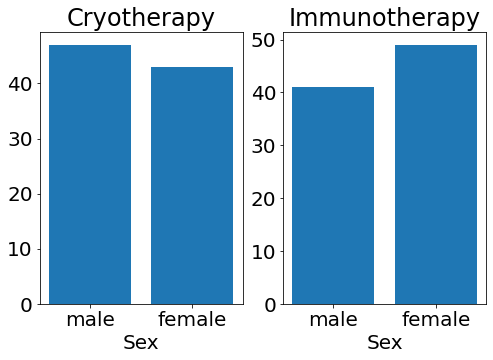

In [93]:
#Broj muskih i zenskih pacijenata po skupovima
sex= ['male', 'female']
cryo_sex = []
immuno_sex = []

cryo_male = len(cryo[cryo['sex'] == 1]) # muski pol cryotherapy
cryo_female = len(cryo[cryo['sex'] == 2]) # zenski pol cryotherapy
cryo_sex.append(cryo_male)
cryo_sex.append(cryo_female)

immuno_male = len(immuno[immuno['sex'] == 1]) # muski pol immunotherapy
immuno_female = len(immuno[immuno['sex'] == 2]) # zenski pol immunotherapy
immuno_sex.append(immuno_male)
immuno_sex.append(immuno_female)

plt.figure(figsize=(8,5))

plt.subplot(1, 2, 1)
plt.bar(sex, cryo_sex)
plt.title('Cryotherapy')
plt.xlabel('Sex')

plt.subplot(1, 2, 2)
plt.bar(sex, immuno_sex)
plt.title('Immunotherapy')
plt.xlabel('Sex')

Text(0.5, 0, 'Responses')

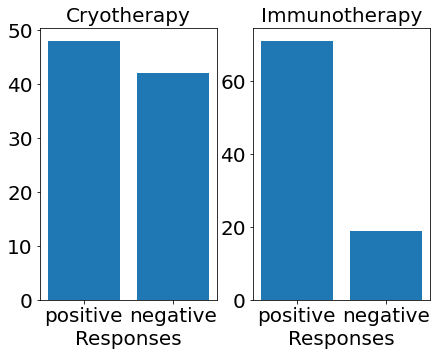

In [94]:
#Broj uspesnih i neuspesnih ishoda po skupovima
results= ['positive', 'negative']
cryo_result = []
immuno_result = []

cryo_positive_result = len(cryo[cryo['Result_of_Treatment'] == 1]) # cryotherapy positive response to therapy
cryo_negative_result = len(cryo[cryo['Result_of_Treatment'] == 0]) # cryotherapy negative response to therapy
cryo_result.append(cryo_positive_result)
cryo_result.append(cryo_negative_result)

immuno_positive_result = len(immuno[immuno['Result_of_Treatment'] == 1]) # immunotherapy positive response to therapy
immuno_negative_result = len(immuno[immuno['Result_of_Treatment'] == 0]) # immunotherapy negative response to therapy
immuno_result.append(immuno_positive_result)
immuno_result.append(immuno_negative_result)

plt.figure(figsize=(7,5))

plt.subplot(1, 2, 1)
plt.bar(results, cryo_result)
plt.title('Cryotherapy', fontsize = 20)
plt.xlabel('Responses', fontsize = 20)

plt.subplot(1, 2, 2)
plt.bar(results, immuno_result)
plt.title('Immunotherapy', fontsize = 20)
plt.xlabel('Responses', fontsize = 20)

In [75]:
immuno_positive_result/90

0.7888888888888889

<AxesSubplot:title={'center':'Number of warts by type - Immunotherapy'}, ylabel='Number_of_Warts'>

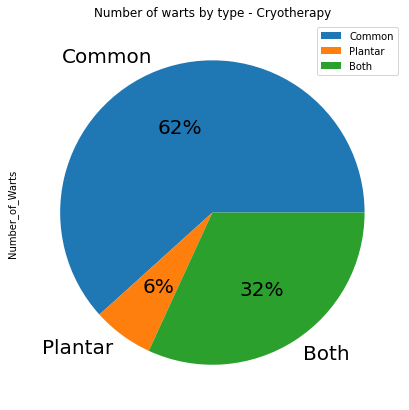

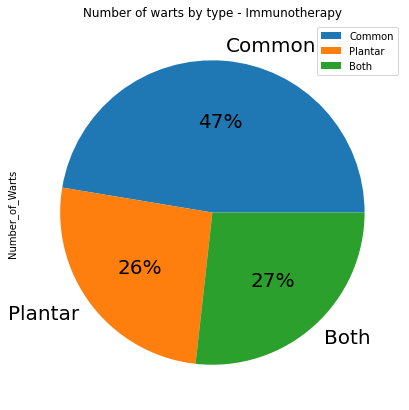

In [84]:
# Zastupljenost bradavica po tipovima u obe terapije
wart_types = ['Common', 'Plantar', 'Both']

cryo_by_type = cryo.groupby(['Type']).sum()
cryo_by_type.index = wart_types
cryo_by_type.plot(kind='pie', y='Number_of_Warts', autopct='%1.0f%%', 
                  title = 'Number of warts by type - Cryotherapy', figsize=[7, 7], fontsize = 20)

immuno_by_type = immuno.groupby(['Type']).sum()
immuno_by_type.index = wart_types
immuno_by_type.plot(kind='pie', y='Number_of_Warts', autopct='%1.0f%%', 
                    title = 'Number of warts by type - Immunotherapy', figsize=[7, 7], fontsize = 20)

<AxesSubplot:title={'center':'Negative response by wart type - Immunotherapy'}, ylabel='Number_of_Warts'>

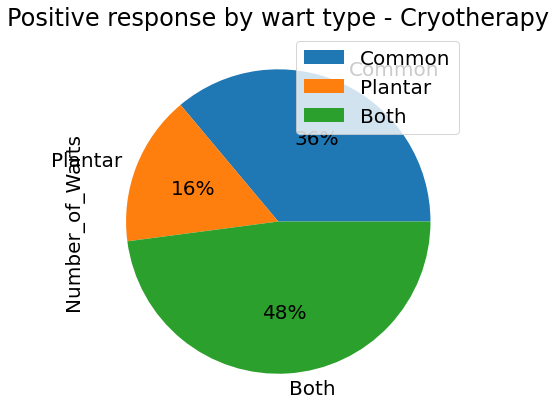

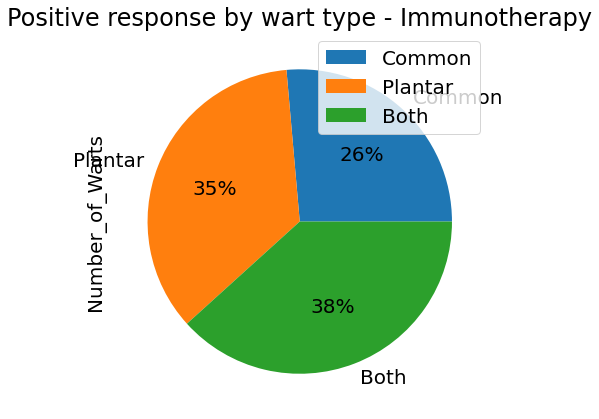

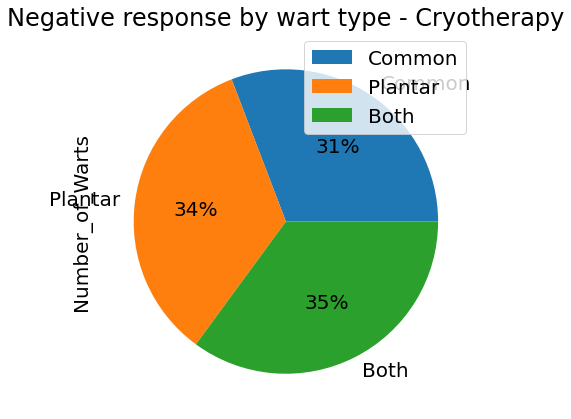

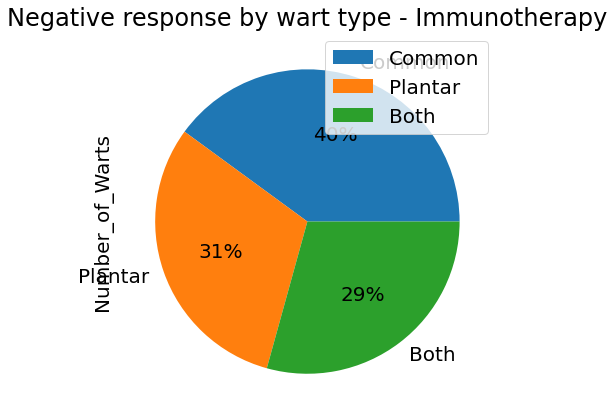

In [101]:
#Za koji tip bradavica je bilo najvise uspeha, a za koji najmanje?- Soritracemo ove vrednosti od najvece do najmanje
wart_types = ['Common', 'Plantar', 'Both']
# NAJVISE USPEHA
cryo_positive_result_df = cryo[cryo["Result_of_Treatment"] == 1].groupby('Type').mean()
cryo_positive_result_df.index = wart_types
cryo_positive_result_df.plot(kind='pie', y='Number_of_Warts', autopct='%1.0f%%', 
                  title = 'Positive response by wart type - Cryotherapy', figsize=[7, 7])

immuno_positive_result_df = immuno[immuno["Result_of_Treatment"] == 1].groupby('Type').mean()
immuno_positive_result_df.index = wart_types
immuno_positive_result_df.plot(kind='pie', y='Number_of_Warts', autopct='%1.0f%%', 
                  title = 'Positive response by wart type - Immunotherapy', figsize=[7, 7])

# NAJMANJE USPEHA
cryo_negative_result_df = cryo[cryo["Result_of_Treatment"] == 0].groupby('Type').mean()
cryo_negative_result_df.index = wart_types
cryo_negative_result_df.plot(kind='pie', y='Number_of_Warts', autopct='%1.0f%%', 
                  title = 'Negative response by wart type - Cryotherapy', figsize=[7, 7])

immuno_negative_result_df = immuno[immuno["Result_of_Treatment"] == 0].groupby('Type').mean()
immuno_negative_result_df.index = wart_types
immuno_negative_result_df.plot(kind='pie', y='Number_of_Warts', autopct='%1.0f%%', 
                  title = 'Negative response by wart type - Immunotherapy', figsize=[7, 7])

In [13]:
# Proveravamo da li broj bradavica koje ima pacijent zavisi od pola pacijenta
cryo_male_average_warts = cryo[cryo.sex == 1].sum().Number_of_Warts
immuno_male_average_warts = immuno[immuno.sex == 1].sum().Number_of_Warts
male_len = len(cryo[cryo.sex == 1]) + len(immuno[immuno.sex == 1])
male_average = (cryo_male_average_warts + immuno_male_average_warts) / male_len

cryo_female_average_warts = cryo[cryo.sex == 2].sum().Number_of_Warts
immuno_female_average_warts = immuno[immuno.sex == 2].sum().Number_of_Warts
female_len = len(cryo[cryo.sex == 2]) + len(immuno[immuno.sex == 2])
female_average = (cryo_female_average_warts + immuno_female_average_warts) / female_len

print('Male average:', male_average)
print('Female average:', female_average)

Male average: 5.556818181818182
Female average: 6.086956521739131


Text(0, 0.5, 'Number of females')

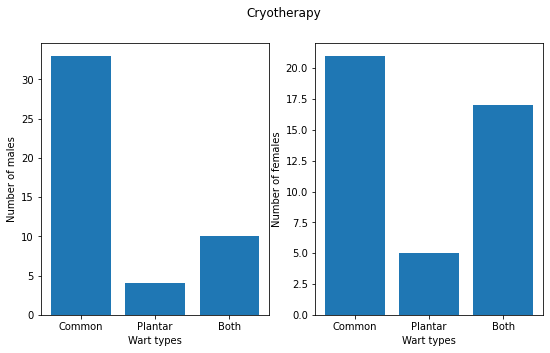

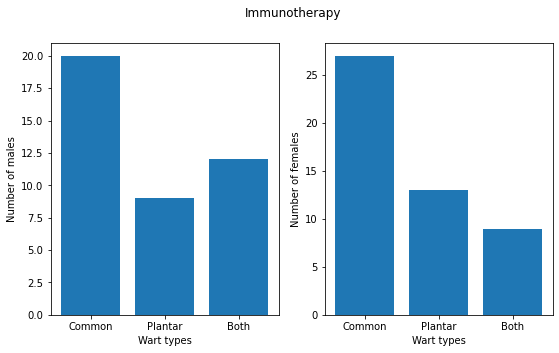

In [14]:
# Provera da li se primecuje razlika u polovima od kojih tipova boluju
wart_types = ['Common', 'Plantar', 'Both']

plt.figure(figsize=(9,5))
plt.suptitle('Cryotherapy')

plt.subplot(1, 2, 1)
plt.bar(wart_types, cryo[cryo.sex == 1].groupby('Type').count().Number_of_Warts)
plt.xlabel('Wart types')
plt.ylabel('Number of males')

plt.subplot(1, 2, 2)
plt.bar(wart_types, cryo[cryo.sex == 2].groupby('Type').count().Number_of_Warts)
plt.xlabel('Wart types')
plt.ylabel('Number of females')

plt.figure(figsize=(9,5))
plt.suptitle('Immunotherapy')

plt.subplot(1, 2, 1)
plt.bar(wart_types, immuno[immuno.sex == 1].groupby('Type').count().Number_of_Warts)
plt.xlabel('Wart types')
plt.ylabel('Number of males')

plt.subplot(1, 2, 2)
plt.bar(wart_types, immuno[immuno.sex == 2].groupby('Type').count().Number_of_Warts)
plt.xlabel('Wart types')
plt.ylabel('Number of females')


Text(0.5, 1.0, 'Immunotherapy')

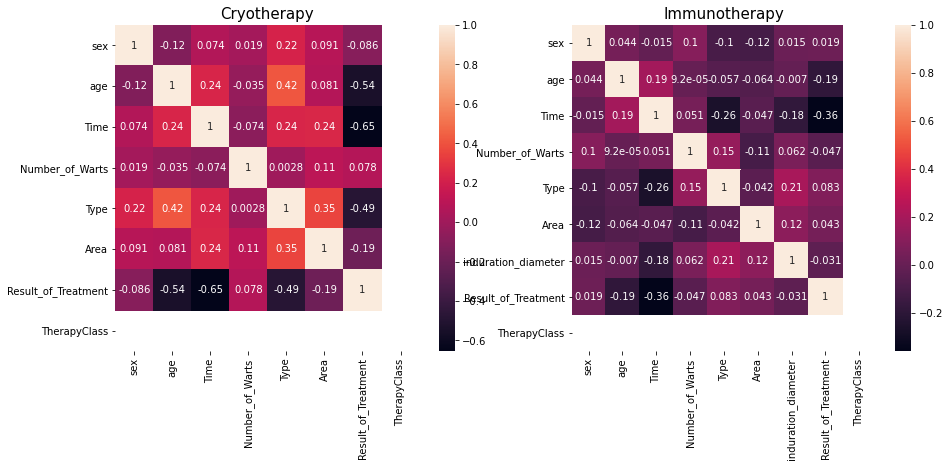

In [108]:
# prikaz korelacije izmedju obelezja na skupovima
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
corr_cryo = cryo.corr()
sn.heatmap(corr_cryo, annot=True);
plt.title('Cryotherapy', fontsize= 15)

plt.subplot(1, 2, 2)
corr_immuno = immuno.corr()
sn.heatmap(corr_immuno, annot=True);
plt.title('Immunotherapy', fontsize= 15)

Text(0, 0.5, 'Age')

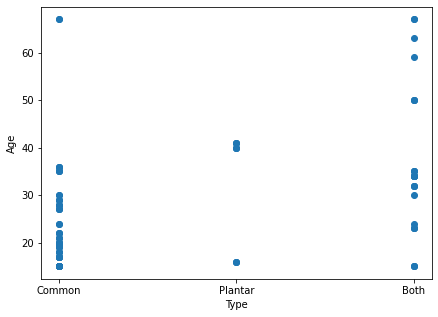

In [16]:
# Vidimo da postoji odredjena korelacija izmedju tipa bradavice i godina pacijenta
plt.figure(figsize=(7,5))
plt.scatter(cryo['Type'],cryo['age'])
plt.xticks([1, 2, 3], ["Common", "Plantar", "Both"])
plt.xlabel('Type')
plt.ylabel('Age')

Text(0.5, 0, 'Age')

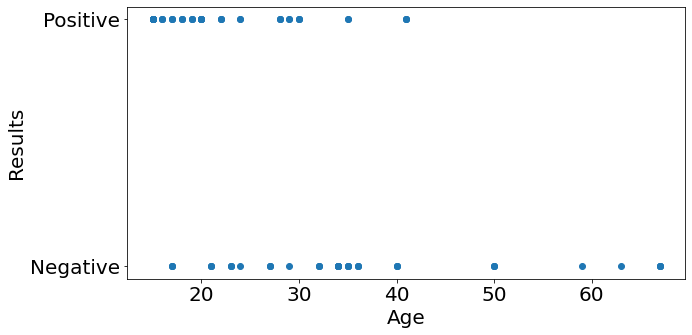

In [140]:
# Vidimo da postoji odredjena korelacija izmedju ishoda terapije i godina pacijenta
# Pozitivni rezultat je uglavnom kod mladje populacije
plt.figure(figsize=(10,5))
plt.scatter(cryo['age'], cryo['Result_of_Treatment'])
plt.yticks([0, 1], ["Negative", "Positive"])
plt.ylabel('Results')
plt.xlabel('Age')

Text(0, 0.5, 'Results')

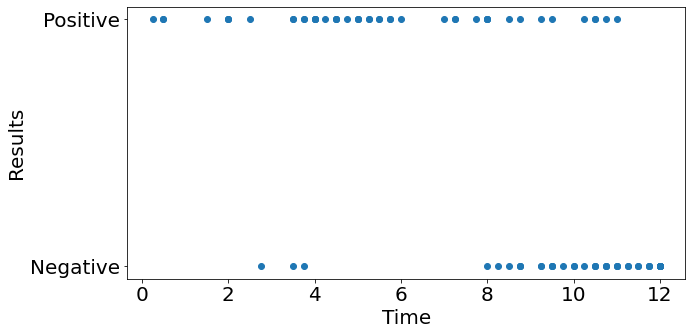

In [141]:
# Primecuje se da je vreme koje je proteklo od pojave bradavice do trenutka terapije veliki faktor u izlecenju
# kod ove metode. Vidno je da pacijenti koji su cekali 8 meseci i duze imaju negativne rezultate terapiju.
# dok pacijenti ispod 8 meseci cekanja su u velikom procentu pozitivno rezultovali.
plt.figure(figsize=(10,5))
plt.scatter(cryo['Time'], cryo['Result_of_Treatment'])
plt.yticks([0, 1], ["Negative", "Positive"])
plt.xlabel('Time')
plt.ylabel('Results')

Text(0, 0.5, 'Type')

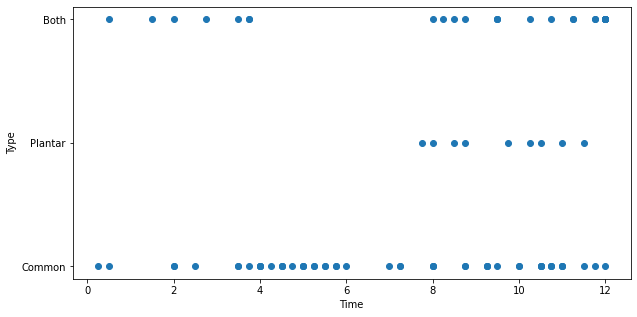

In [19]:
# Primecujemo da uglavnom posle 8 meseci cekanja se jave pacijenti koji su imali plantar tip
plt.figure(figsize=(10,5))
plt.scatter(cryo['Time'], cryo['Type'])
plt.yticks([1, 2, 3], ["Common", "Plantar", "Both"])
plt.xlabel('Time')
plt.ylabel('Type')

Text(0.5, 0, 'Area')

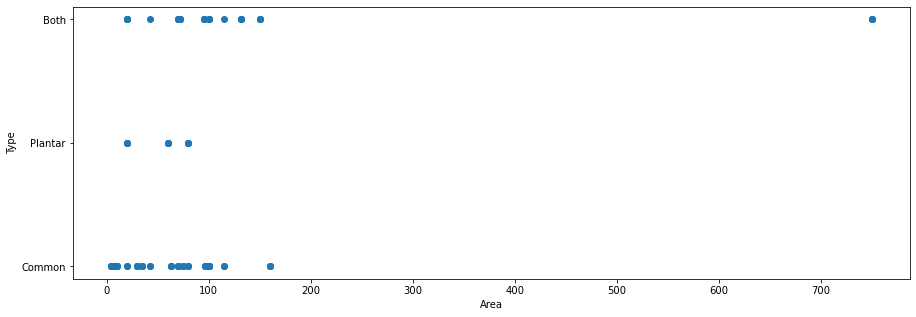

In [20]:
# Vidimo da plantar tip bradavice uglavnom ima fiksirane velicine koje su karakteristicne za njega, dok 
# common tip moze biti bilo koje velicine
plt.figure(figsize=(15,5))
plt.scatter(cryo['Area'], cryo['Type'])
plt.yticks([1, 2, 3], ["Common", "Plantar", "Both"])
plt.ylabel('Type')
plt.xlabel('Area')

Text(0, 0.5, 'Area')

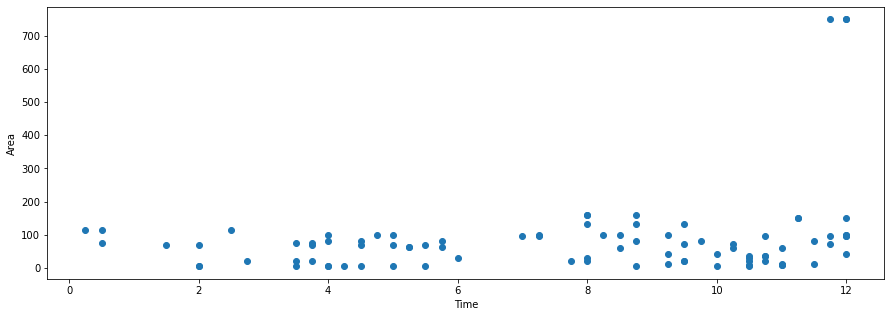

In [68]:
# Logicno je da su dobijene ovakve vrednosti, jer bradavica ako se ne tretira u pocetku, 
# ona ce porasti do svoje odredjene velicine i onda ce samo stajati na telu.
plt.figure(figsize=(15,5))
plt.scatter(cryo['Time'], cryo['Area'])
# plt.yticks([1, 2, 3], ["Common", "Plantar", "Both"])
plt.xlabel('Time')
plt.ylabel('Area')

# Funkcije

###### Funkcija evaluacije

In [22]:
def evaluation_classif(conf_mat):
    TP = conf_mat[1, 1]
    TN = conf_mat[0, 0]
    FP = conf_mat[0, 1]
    FN = conf_mat[1, 0]
    precision = TP/(TP+FP)
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    sensitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)
    F_score = 2*precision*sensitivity/(precision+sensitivity)
    print('precision: ', precision)
    print('accuracy: ', accuracy)
    print('sensitivity/recall: ', sensitivity)
    print('specificity: ', specificity)
    print('F score: ', F_score)

###### Funkcija za racunanje preciznosti

In [59]:
def ClassPrecision(conf_mat, classes):
    prec_temp = []
    N = conf_mat.shape[0]
    for i in range(N):
        j = np.delete(np.array(range(N)),i) 
        TP = conf_mat[i,i]
        FP = sum(conf_mat[j,i])
        prec_temp.append(TP/(TP+FP))
        print('Klasa: ', classes[i])
        print('Preciznost: ', prec_temp[i])
    prec_avg = np.mean(prec_temp)
    return prec_avg

###### Broj Foldova za CV

In [23]:
fold_number = 10

# Spajanje datasetova

###### Spajanje skupova

In [24]:
cryo['TherapyClass'] = 10
immuno['TherapyClass'] = 20

frames = [cryo, immuno]
therapy = pd.concat(frames)

In [25]:
therapy.fillna(value = 0, inplace = True)

###### Podela na trening i test skup

In [26]:
X_therapy = therapy[['sex','age','Time', 'Number_of_Warts', 'Type', 'Area', 'TherapyClass', 'induration_diameter']].copy()
y_therapy = therapy['Result_of_Treatment'].copy()

In [27]:
# X_therapy - ulazna obelezja
# y_therapy - labele
# STRATIFY - sluzni da se odrzi klasni balans
# RANDOM_STATE - pocetni seed, koriscen radi ponovljivosti
# test_size - odnos test i train set-a
x_train, x_test, y_train, y_test = train_test_split(X_therapy, y_therapy, test_size=0.10, stratify=y_therapy, random_state=46)

###### Standardizacija

In [28]:
# Standardizacija obelezja (svodjenje na sr.vr. 0 i varijansu 1)
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)
x_train.columns = list(X_therapy.columns)
x_test.columns = list(X_therapy.columns)
x_train.shape

(162, 8)

# Algoritmi

# KNN

###### Trazenje optimalnih parametara

In [29]:
# # Parametri za cross_val_score:
# # knn - estimator kojim fitujemo podatke
# # x_train- podaci koje fitujemo, ovaj parametar moze biti niz, lista, itd...
# # y_train - ciljane promenljive koje pokusavamo da prediktujemo
# # cv - broj foldova na koje delimo
# # scoring - Belezimo vrednosti accuracy

k_range = range(1, 50)
k_scores_cv10_manhattan, k_scores_cv10_euclidean, k_scores_cv10_minkowski3 = [], [], []

for k in k_range:
        knn = KNeighborsClassifier(n_neighbors = k, metric = 'manhattan')
        scores_cv10 = cross_val_score(knn, x_train, y_train, cv = 10, scoring = 'precision')
        k_scores_cv10_manhattan.append(scores_cv10.mean())
        
        knn = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
        scores_cv10 = cross_val_score(knn, x_train, y_train, cv = 10, scoring = 'precision')
        k_scores_cv10_euclidean.append(scores_cv10.mean())
        
        knn = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski', p=3)
        scores_cv10 = cross_val_score(knn, x_train, y_train, cv = 10, scoring = 'precision')
        k_scores_cv10_minkowski3.append(scores_cv10.mean())

In [111]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 20

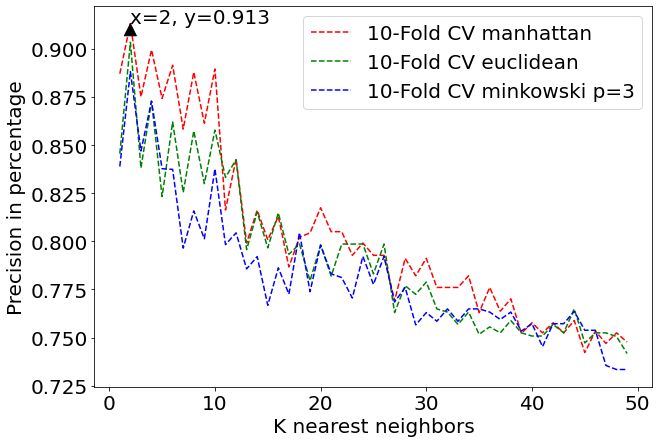

In [114]:
# Ova celija nam sluzi da vizuelno prikazemo najbolje parametre: vrednost za k
# Zakljucak: 
# Dobili smo da je optimalno resenje k = 2 i 10-fold unakrsna validacija sa manhattan metrikom, 
# tako da cemo to i ubaciti u algoritam
plt.figure(figsize=(10, 7))
plt.plot(k_range, k_scores_cv10_manhattan, 'r--', label = '10-Fold CV manhattan')
plt.plot(k_range, k_scores_cv10_euclidean, 'g--', label = '10-Fold CV euclidean')
plt.plot(k_range, k_scores_cv10_minkowski3, 'b--', label = '10-Fold CV minkowski p=3')

# sluzi da nadje vrednost x za koju je y najveci u 10-fold za manhattan
ymax_cv10_manhattan = max(k_scores_cv10_manhattan)
xpos_cv10_manhattan = k_scores_cv10_manhattan.index(ymax_cv10_manhattan)
xmax_cv10_manhattan = k_range[xpos_cv10_manhattan]

# sluzi da nadje vrednost x za koju je y najveci u 10-fold za euclidean
ymax_cv10_euclidean = max(k_scores_cv10_euclidean)
xpos_cv10_euclidean = k_scores_cv10_euclidean.index(ymax_cv10_euclidean)
xmax_cv10_euclidean= k_range[xpos_cv10_euclidean]

# sluzi da nadje vrednost x za koju je y najveci u 10-fold za minkowski p=3
ymax_cv10_minkowski3 = max(k_scores_cv10_minkowski3)
xpos_cv10_minkowski3 = k_scores_cv10_minkowski3.index(ymax_cv10_minkowski3)
xmax_cv10_minkowski3 = k_range[xpos_cv10_minkowski3]

# posto nam treba jedan par koordinata, a to je onaj par od najvece vrednosti, pravimo par (Xmax, Ymax)
# u odnosu na to koja y vrednost veca (za cv = 5 ili za cv = 10)
if (ymax_cv10_manhattan > ymax_cv10_euclidean) & (ymax_cv10_manhattan > ymax_cv10_minkowski3):
    Xmax = xmax_cv10_manhattan
    Ymax = ymax_cv10_manhattan
if (ymax_cv10_euclidean > ymax_cv10_manhattan) & (ymax_cv10_euclidean > ymax_cv10_minkowski3):
    Xmax = xmax_cv10_euclidean
    Ymax = ymax_cv10_euclidean
if (ymax_cv10_minkowski3 > ymax_cv10_manhattan) & (ymax_cv10_minkowski3 > ymax_cv10_euclidean):
    Xmax = xmax_cv10_minkowski3
    Ymax = ymax_cv10_minkowski3

text= "x={:.0f}, y={:.3f}".format(Xmax, Ymax) # forma teksta koji ce se pokazati na grafiku   
plt.annotate(text, xy=(Xmax, Ymax), arrowprops=dict(facecolor='black', shrink=0.05)) # sluzi za anotaciju tacke na grafiku
# cije su zadate koordinate, u nasem slucaju Xmax i Ymax
plt.xlabel('K nearest neighbors')
plt.ylabel('Precision in percentage')
plt.legend()

###### Primena optimalnih parametara na algoritam

 
-----------------------------------------------------------------------------
---------------------------------FINAL MATRIX--------------------------------


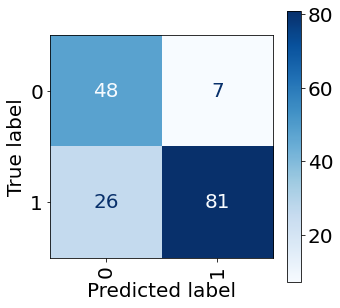

AVERAGE ACCURACY:  0.7962962962962963
 
precision:  0.9204545454545454
accuracy:  0.7962962962962963
sensitivity/recall:  0.7570093457943925
specificity:  0.8727272727272727
F score:  0.8307692307692307


In [118]:
kf = StratifiedKFold(n_splits=fold_number, shuffle=True, random_state=42)

# generise indexe na koje cemo podeliti skup na trening i test
indexes = kf.split(x_train, y_train) 

# formiramo finalnu matricu od nula koja je dimenzija NxN, gde je N broj klasa
fin_conf_mat = np.zeros((len(np.unique(y_train)),len(np.unique(y_train))))

for train_index, test_index in indexes: 
    X1_train = x_train.iloc[train_index,:]
    X1_test = x_train.iloc[test_index,:]
    Y1_train = y_train.iloc[train_index]
    Y1_test = y_train.iloc[test_index]

    #Inicijalizacija
    classifier = KNeighborsClassifier(n_neighbors=2, metric='manhattan')
    
    # Obuka
    classifier.fit(X1_train, Y1_train)
    
    # Testiranje
    y1_pred = classifier.predict(X1_test)

    #Matrica konfuzije
    conf_mat = confusion_matrix(Y1_test, y1_pred, labels=classifier.classes_) 
    
#     disp = ConfusionMatrixDisplay.from_predictions(y_true=Y1_test, y_pred=y1_pred, labels=classifier.classes_, cmap=plt.cm.Blues, xticks_rotation=90)   
    
#     plt.show()
#     print("Accuracy = {}".format(accuracy_score(Y1_test, y1_pred)))
    fin_conf_mat += conf_mat

print(' ')
print('-----------------------------------------------------------------------------')
print('---------------------------------FINAL MATRIX--------------------------------')
disp = ConfusionMatrixDisplay(confusion_matrix=fin_conf_mat, display_labels=classifier.classes_) 
disp.plot(cmap="Blues", values_format='.5g', xticks_rotation=90)
plt.show()
# kao konacna mera uspesnosti klasifikatora sa vise klasa se koristi AVERAGE ACCURACY, kao prosek tačnosti po klasama, 
# i stopa greške, kao prosek greške klasifikacije po klasi (ova nije koriscena)
print('AVERAGE ACCURACY: ', np.trace(fin_conf_mat)/sum(sum(fin_conf_mat)))
print(' ')
evaluation_classif(fin_conf_mat.astype('int'))

###### Testiranje na glavnom test skupu

 
-----------------------------------------------------------------------------
-----------------------------------TEST SKUP----------------------------------


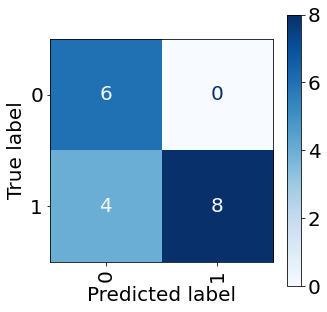

 
precision:  1.0
accuracy:  0.7777777777777778
sensitivity/recall:  0.6666666666666666
specificity:  1.0
F score:  0.8


In [129]:
classifier = KNeighborsClassifier(n_neighbors=2, metric='manhattan')
classifier.fit(x_train, y_train)
    
y_pred = classifier.predict(x_test)
conf_mat = confusion_matrix(y_test, y_pred, labels=classifier.classes_)

print(' ')
print('-----------------------------------------------------------------------------')
print('-----------------------------------TEST SKUP----------------------------------')  
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=classifier.classes_) 
disp.plot(cmap="Blues", values_format='.5g', xticks_rotation=90)
plt.show()
print(' ')
evaluation_classif(conf_mat)

# RandomForest

###### Trazenje optimalnih parametara

In [33]:
# parameters = {'n_estimators':[5, 10, 20, 50, 100], 'criterion':('gini', 'entropy'), 'max_depth':[5, 10, 20, 50, 100],
#               'min_samples_split':[0.01, 0.05], 'class_weight':(None, 'balanced'), 'bootstrap' : (True, False)}

# rf = RandomForestClassifier()
# clf=GridSearchCV(rf, parameters, cv=10)
# clf.fit(x_train, y_train)

# print(clf.best_score_)
# print(clf.best_params_)
# # 0.8955882352941178
# # {'bootstrap': False, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 0.05, 'n_estimators': 20}


###### Primena optimalnih parametara

 
-----------------------------------------------------------------------------
---------------------------------FINAL MATRIX--------------------------------


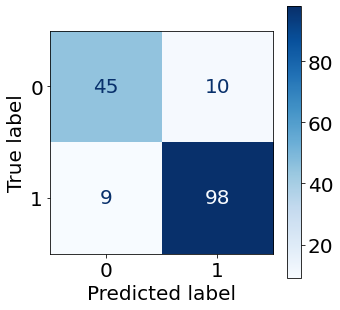

AVERAGE ACCURACY:  0.8827160493827161
 
precision:  0.9074074074074074
accuracy:  0.8827160493827161
sensitivity/recall:  0.9158878504672897
specificity:  0.8181818181818182
F score:  0.9116279069767442


In [122]:
# U algoritam su uneti optimalni parametri
kf = StratifiedKFold(n_splits=fold_number, shuffle=True, random_state=42)
indexes = kf.split(x_train, y_train)
fin_conf_mat_rf = np.zeros((len(np.unique(y_train)),len(np.unique(y_train))))

for train_index, test_index in indexes:
    classifier = RandomForestClassifier(n_estimators=20, max_depth=5, bootstrap= False, class_weight = 'balanced', criterion= 'gini', min_samples_split = 0.05, random_state=42)
    classifier.fit(x_train.iloc[train_index,:], y_train.iloc[train_index])
   
    Y_pred = classifier.predict(x_train.iloc[test_index,:])
    conf_mat = confusion_matrix(y_train.iloc[test_index], Y_pred, labels=classifier.classes_)
#     disp = ConfusionMatrixDisplay.from_predictions(y_true=y_train.iloc[test_index], y_pred=Y_pred, labels=classifier.classes_, cmap=plt.cm.Blues)   
#     plt.show()
#     print("Accuracy = {}".format(accuracy_score(y_train.iloc[test_index], Y_pred)))
    fin_conf_mat_rf += conf_mat
    
print(' ')
print('-----------------------------------------------------------------------------')
print('---------------------------------FINAL MATRIX--------------------------------')    
disp = ConfusionMatrixDisplay(confusion_matrix=fin_conf_mat_rf, display_labels=classifier.classes_) 
disp.plot(cmap="Blues", values_format='.5g')
plt.show()
print('AVERAGE ACCURACY: ', np.trace(fin_conf_mat_rf)/sum(sum(fin_conf_mat_rf)))
print(' ')
evaluation_classif(fin_conf_mat_rf.astype('int'))

###### Testiranje na glavnom test skupu

 
-----------------------------------------------------------------------------
-----------------------------------TEST SKUP----------------------------------


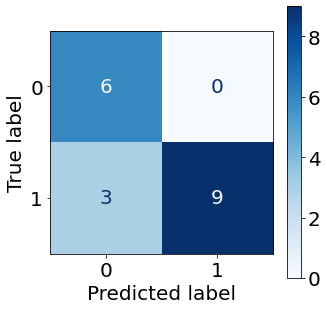

 
precision:  1.0
accuracy:  0.8333333333333334
sensitivity/recall:  0.75
specificity:  1.0
F score:  0.8571428571428571


In [130]:
classifier = RandomForestClassifier(n_estimators=20, max_depth=5, bootstrap= False, class_weight = 'balanced', criterion= 'gini', min_samples_split = 0.05, random_state=42)
classifier.fit(x_train, y_train)

y_pred=classifier.predict(x_test)
conf_mat = confusion_matrix(y_test, y_pred, labels=classifier.classes_)

print(' ')
print('-----------------------------------------------------------------------------')
print('-----------------------------------TEST SKUP----------------------------------')    
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=classifier.classes_) 
disp.plot(cmap="Blues", values_format='.5g')
plt.show()
print(' ')
evaluation_classif(conf_mat)

# Logistic regression

Broj iteracija: 100
Solver: lbfgs
Preciznost je: 0.8841142191142193
Matrica konfuzije:


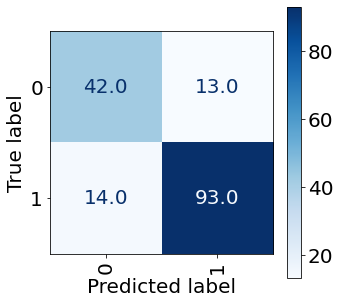

Broj iteracija: 100
Solver: newton-cg
Preciznost je: 0.8841142191142193
Matrica konfuzije:


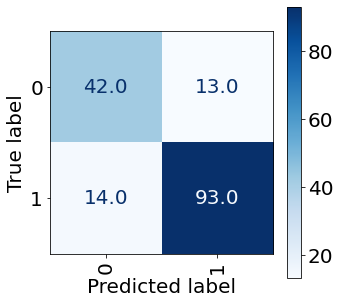

Broj iteracija: 100
Solver: liblinear
Preciznost je: 0.8916899766899767
Matrica konfuzije:


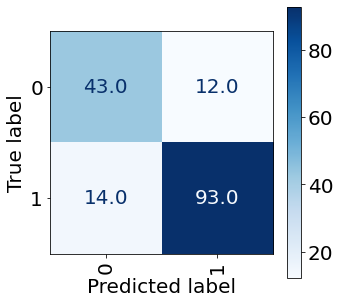

Broj iteracija: 100
Solver: sag
Preciznost je: 0.8841142191142193
Matrica konfuzije:


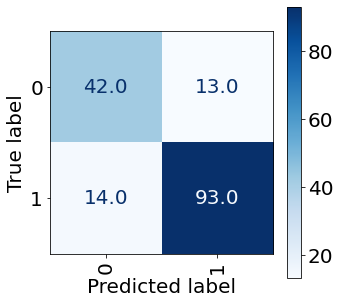

Broj iteracija: 100
Solver: saga
Preciznost je: 0.8841142191142193
Matrica konfuzije:


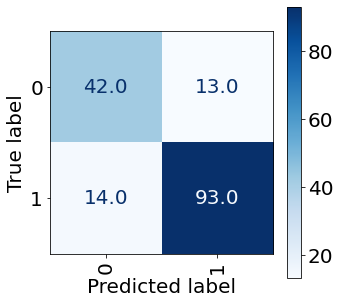

Broj iteracija: 200
Solver: lbfgs
Preciznost je: 0.8841142191142193
Matrica konfuzije:


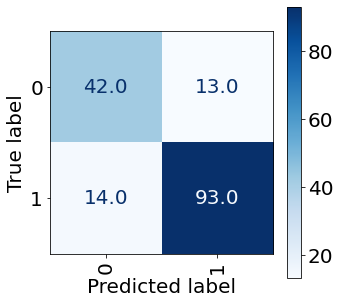

Broj iteracija: 200
Solver: newton-cg
Preciznost je: 0.8841142191142193
Matrica konfuzije:


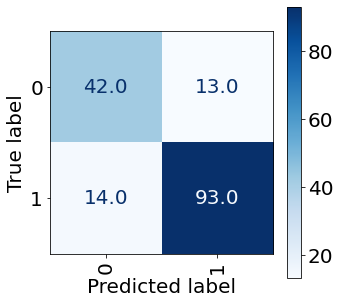

Broj iteracija: 200
Solver: liblinear
Preciznost je: 0.8916899766899767
Matrica konfuzije:


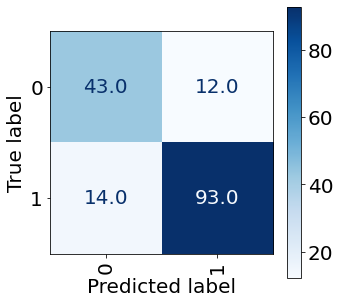

Broj iteracija: 200
Solver: sag
Preciznost je: 0.8841142191142193
Matrica konfuzije:


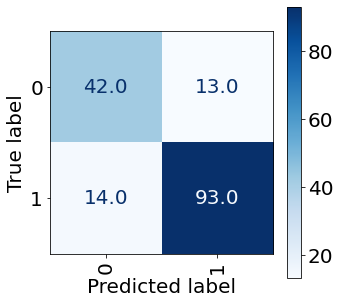

Broj iteracija: 200
Solver: saga
Preciznost je: 0.8841142191142193
Matrica konfuzije:


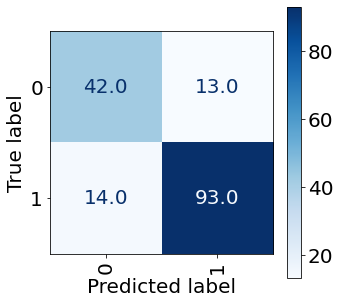

Broj iteracija: 400
Solver: lbfgs
Preciznost je: 0.8841142191142193
Matrica konfuzije:


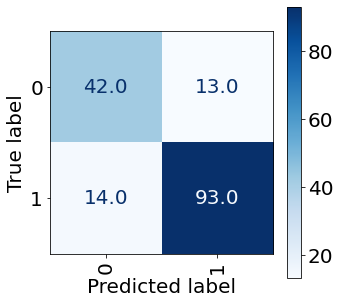

Broj iteracija: 400
Solver: newton-cg
Preciznost je: 0.8841142191142193
Matrica konfuzije:


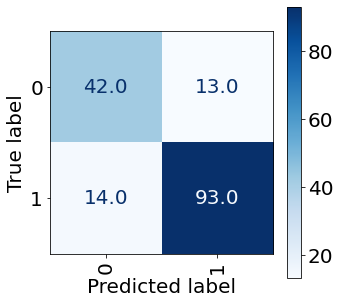

Broj iteracija: 400
Solver: liblinear
Preciznost je: 0.8916899766899767
Matrica konfuzije:


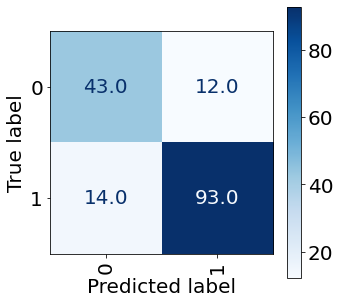

Broj iteracija: 400
Solver: sag
Preciznost je: 0.8841142191142193
Matrica konfuzije:


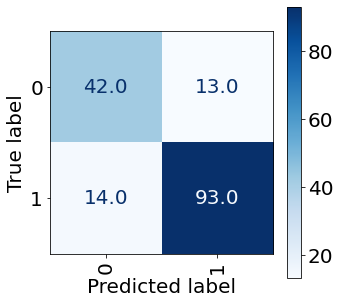

Broj iteracija: 400
Solver: saga
Preciznost je: 0.8841142191142193
Matrica konfuzije:


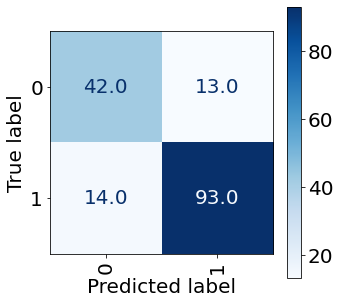

Broj iteracija: 500
Solver: lbfgs
Preciznost je: 0.8841142191142193
Matrica konfuzije:


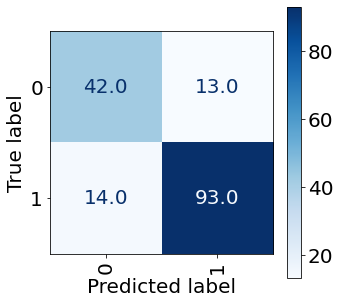

Broj iteracija: 500
Solver: newton-cg
Preciznost je: 0.8841142191142193
Matrica konfuzije:


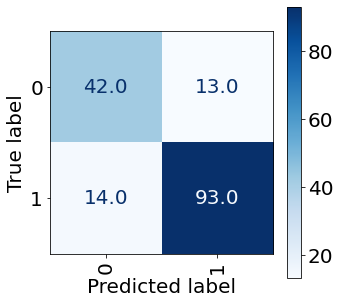

Broj iteracija: 500
Solver: liblinear
Preciznost je: 0.8916899766899767
Matrica konfuzije:


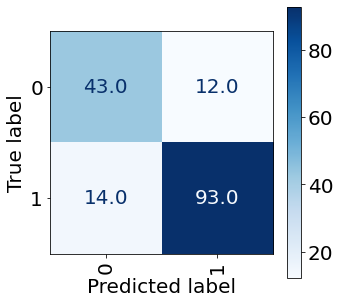

Broj iteracija: 500
Solver: sag
Preciznost je: 0.8841142191142193
Matrica konfuzije:


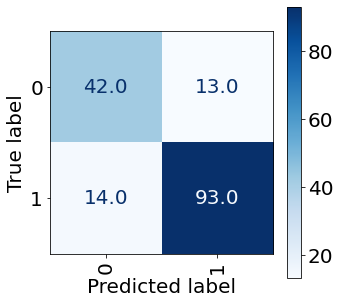

Broj iteracija: 500
Solver: saga
Preciznost je: 0.8841142191142193
Matrica konfuzije:


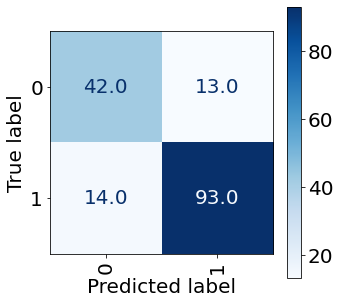

Broj iteracija: 1000
Solver: lbfgs
Preciznost je: 0.8841142191142193
Matrica konfuzije:


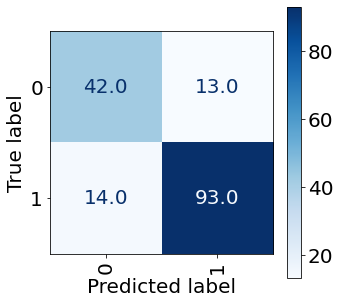

Broj iteracija: 1000
Solver: newton-cg
Preciznost je: 0.8841142191142193
Matrica konfuzije:


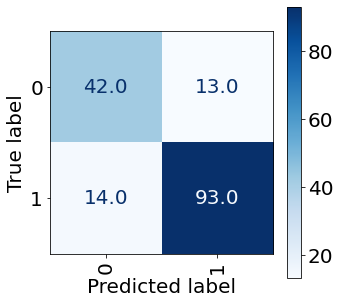

Broj iteracija: 1000
Solver: liblinear
Preciznost je: 0.8916899766899767
Matrica konfuzije:


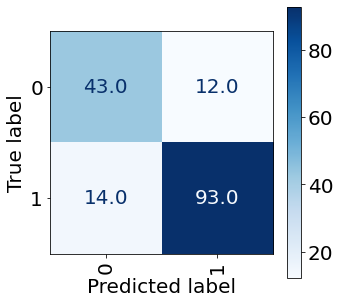

Broj iteracija: 1000
Solver: sag
Preciznost je: 0.8841142191142193
Matrica konfuzije:


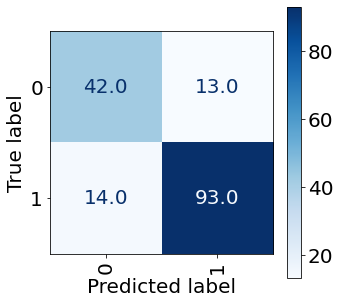

Broj iteracija: 1000
Solver: saga
Preciznost je: 0.8841142191142193
Matrica konfuzije:


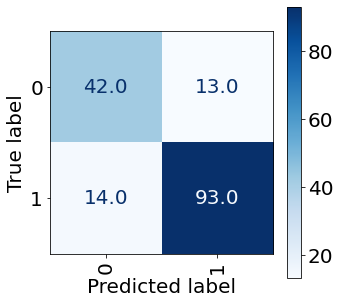

precision:  0.8773584905660378
accuracy:  0.8333333333333334
sensitivity/recall:  0.8691588785046729
specificity:  0.7636363636363637
F score:  0.8732394366197183
--------------------------------

Najbolja preciznost je u iteraciji broj:  2


In [128]:
kf = StratifiedKFold(n_splits=fold_number, shuffle=True, random_state=42)
prec = []
for num in [100, 200, 400, 500, 1000]:
    for solv in ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga']:
        indexes = kf.split(x_train, y_train)
        prec_tmp = []
        fin_conf_mat = np.zeros((len(np.unique(y_therapy)),len(np.unique(y_therapy))))
        for train_index, test_index in indexes:
            classifier = LogisticRegression(max_iter = num, solver = solv)
            classifier.fit(x_train.iloc[train_index,:],y_train.iloc[train_index])
            y_pred = classifier.predict(x_train.iloc[test_index,:])
            prec_tmp.append(precision_score(y_train.iloc[test_index], y_pred))
            fin_conf_mat += confusion_matrix(y_train.iloc[test_index], y_pred, labels=classifier.classes_)
        print('Broj iteracija:', num)
        print('Solver:', solv)
        print('Preciznost je:', np.mean(prec_tmp)) 
        print('Matrica konfuzije:')
        
        plt.rcParams['figure.figsize'] = [5, 5]
        disp = ConfusionMatrixDisplay(confusion_matrix =fin_conf_mat,  display_labels=classifier.classes_)
        disp.plot(cmap="Blues", values_format='', xticks_rotation=90)  
        plt.show()
        prec.append(np.mean(prec_tmp))
        
evaluation_classif(fin_conf_mat)
print('--------------------------------')
print('')    
print('Najbolja preciznost je u iteraciji broj: ', np.argmax(prec))

###### Testiranje na glavnom test skupu

 
-----------------------------------------------------------------------------
-----------------------------------TEST SKUP----------------------------------


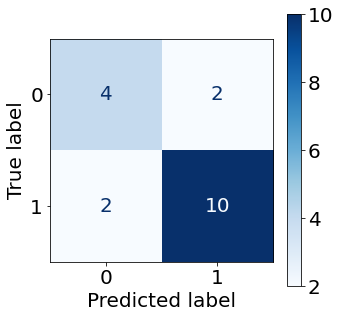

 
precision:  0.8333333333333334
accuracy:  0.7777777777777778
sensitivity/recall:  0.8333333333333334
specificity:  0.6666666666666666
F score:  0.8333333333333334


In [132]:
classifier = LogisticRegression(max_iter = 100, solver = 'liblinear')
classifier.fit(x_train, y_train)

y_pred=classifier.predict(x_test)
conf_mat = confusion_matrix(y_test, y_pred, labels=classifier.classes_)

print(' ')
print('-----------------------------------------------------------------------------')
print('-----------------------------------TEST SKUP----------------------------------')    
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=classifier.classes_) 
disp.plot(cmap="Blues", values_format='.5g')
plt.show()
print(' ')
evaluation_classif(conf_mat)

# REDUKCIJA DIMENZIONALNOSTI

###### Redukcija sa LDA

In [38]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(x_train, y_train)
x_train_r = lda.transform(x_train)
x_test_r = lda.transform(x_test)

x_train_r = pd.DataFrame(x_train_r)
x_test_r = pd.DataFrame(x_test_r)

# KNN sa redukcijom

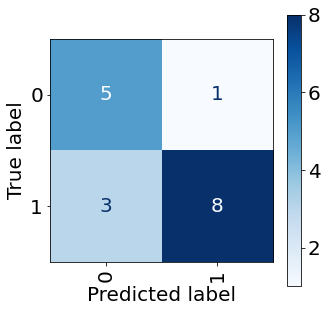

Accuracy = 0.7647058823529411


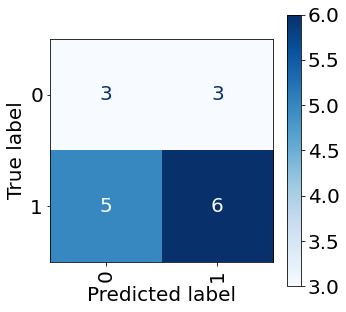

Accuracy = 0.5294117647058824


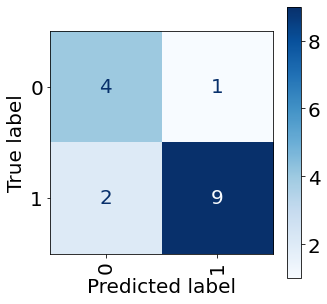

Accuracy = 0.8125


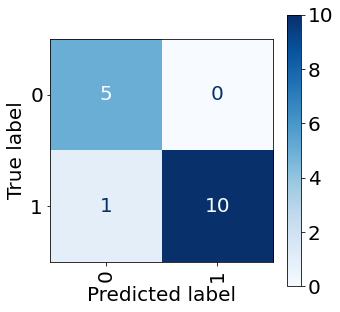

Accuracy = 0.9375


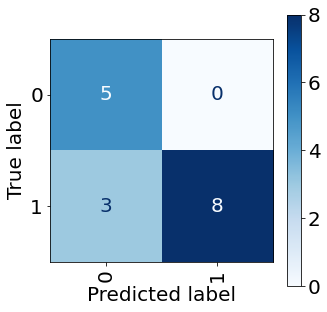

Accuracy = 0.8125


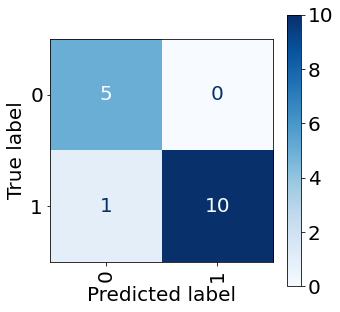

Accuracy = 0.9375


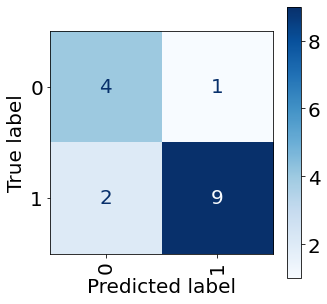

Accuracy = 0.8125


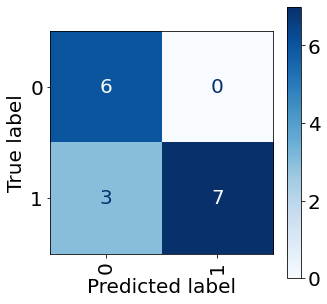

Accuracy = 0.8125


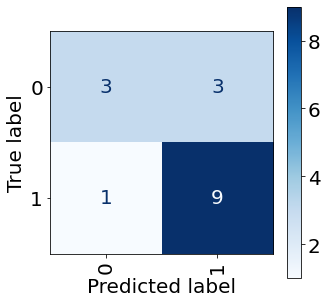

Accuracy = 0.75


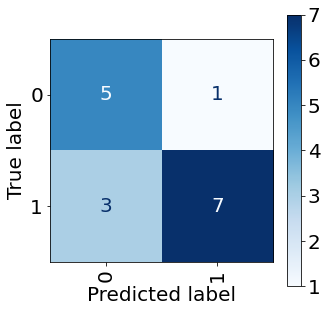

Accuracy = 0.75
 
-----------------------------------------------------------------------------
---------------------------------FINAL MATRIX--------------------------------


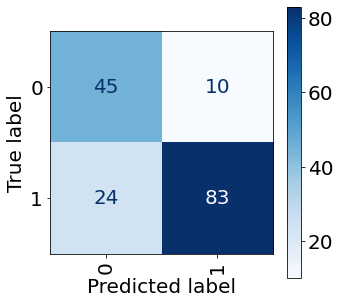

AVERAGE ACCURACY:  0.7901234567901234
 
precision:  0.8924731182795699
accuracy:  0.7901234567901234
sensitivity/recall:  0.7757009345794392
specificity:  0.8181818181818182
F score:  0.83


In [133]:
kf = StratifiedKFold(n_splits=fold_number, shuffle=True, random_state=42)

# generise indexe na koje cemo podeliti skup na trening i test
indexes = kf.split(x_train_r, y_train) 

# formiramo finalnu matricu od nula koja je dimenzija NxN, gde je N broj klasa
fin_conf_mat = np.zeros((len(np.unique(y_train)),len(np.unique(y_train))))

for train_index, test_index in indexes: 
    X1_train = x_train_r.iloc[train_index,:]
    X1_test = x_train_r.iloc[test_index,:]
    Y1_train = y_train.iloc[train_index]
    Y1_test = y_train.iloc[test_index]

    #Inicijalizacija
    classifier = KNeighborsClassifier(n_neighbors=2, metric='manhattan')
    
    # Obuka
    classifier.fit(X1_train, Y1_train)
    
    # Testiranje
    y1_pred = classifier.predict(X1_test)

    #Matrica konfuzije
    conf_mat = confusion_matrix(Y1_test, y1_pred, labels=classifier.classes_) 
    
    disp = ConfusionMatrixDisplay.from_predictions(y_true=Y1_test, y_pred=y1_pred, labels=classifier.classes_, cmap=plt.cm.Blues, xticks_rotation=90)   
    
    plt.show()
    print("Accuracy = {}".format(accuracy_score(Y1_test, y1_pred)))
    fin_conf_mat += conf_mat

print(' ')
print('-----------------------------------------------------------------------------')
print('---------------------------------FINAL MATRIX--------------------------------')
disp = ConfusionMatrixDisplay(confusion_matrix=fin_conf_mat, display_labels=classifier.classes_) 
disp.plot(cmap="Blues", values_format='.5g', xticks_rotation=90)
plt.show()
# kao konacna mera uspesnosti klasifikatora sa vise klasa se koristi AVERAGE ACCURACY, kao prosek tačnosti po klasama, 
# i stopa greške, kao prosek greške klasifikacije po klasi (ova nije koriscena)
print('AVERAGE ACCURACY: ', np.trace(fin_conf_mat)/sum(sum(fin_conf_mat)))
print(' ')
evaluation_classif(fin_conf_mat.astype('int'))

###### Testiranje na glavnom test skupu

 
-----------------------------------------------------------------------------
-----------------------------------TEST SKUP----------------------------------


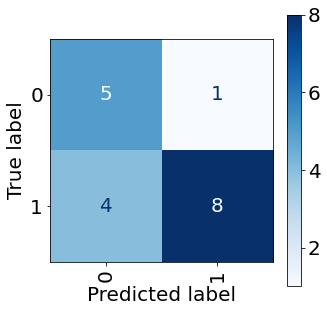

 
precision:  0.8888888888888888
accuracy:  0.7222222222222222
sensitivity/recall:  0.6666666666666666
specificity:  0.8333333333333334
F score:  0.761904761904762


In [137]:
classifier = KNeighborsClassifier(n_neighbors=2, metric='manhattan')
classifier.fit(x_train_r, y_train)
    
y_pred = classifier.predict(x_test_r)
conf_mat = confusion_matrix(y_test, y_pred, labels=classifier.classes_)

print(' ')
print('-----------------------------------------------------------------------------')
print('-----------------------------------TEST SKUP----------------------------------')  
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=classifier.classes_) 
disp.plot(cmap="Blues", values_format='.5g', xticks_rotation=90)
plt.show()
print(' ')
evaluation_classif(conf_mat)

# RandomForest sa redukcijom

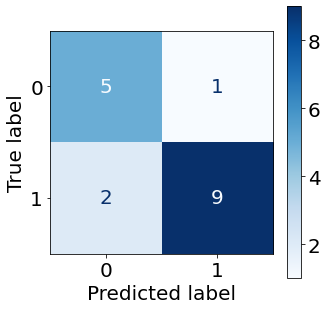

Accuracy = 0.8235294117647058


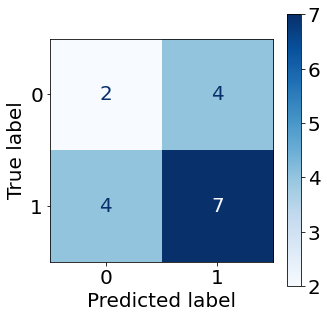

Accuracy = 0.5294117647058824


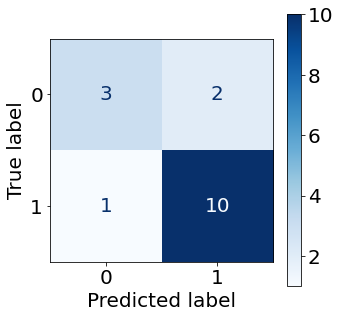

Accuracy = 0.8125


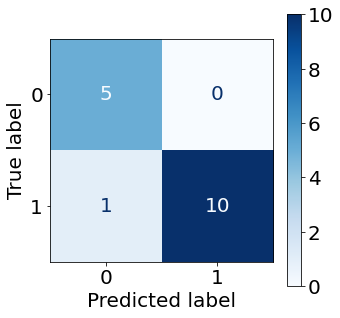

Accuracy = 0.9375


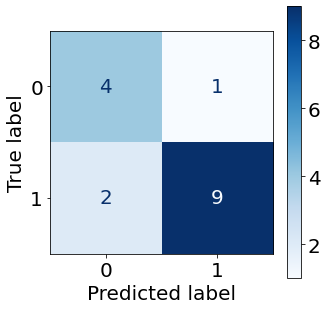

Accuracy = 0.8125


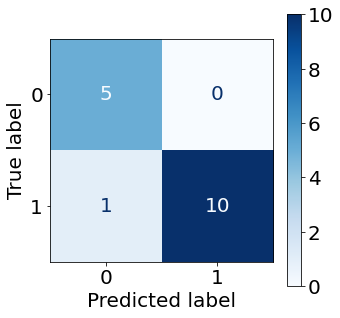

Accuracy = 0.9375


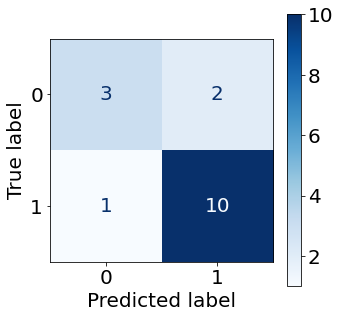

Accuracy = 0.8125


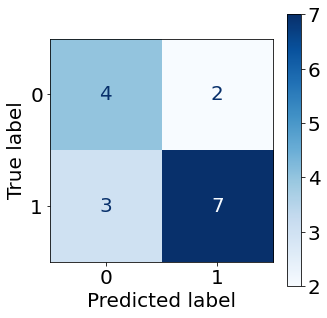

Accuracy = 0.6875


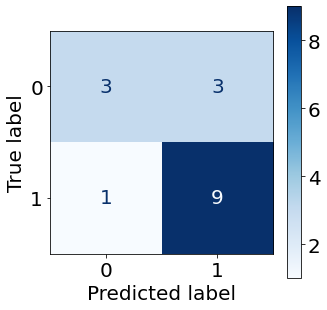

Accuracy = 0.75


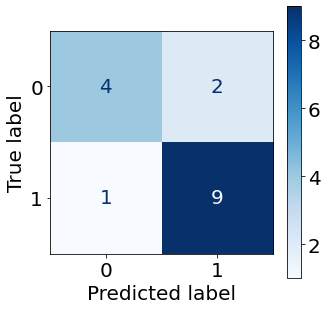

Accuracy = 0.8125
 
-----------------------------------------------------------------------------
---------------------------------FINAL MATRIX--------------------------------


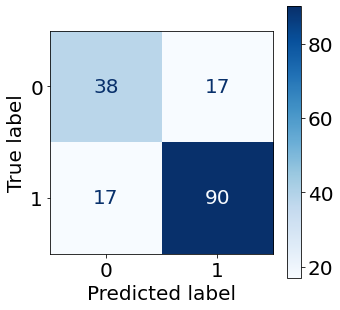

AVERAGE ACCURACY:  0.7901234567901234
 
precision:  0.8411214953271028
accuracy:  0.7901234567901234
sensitivity/recall:  0.8411214953271028
specificity:  0.6909090909090909
F score:  0.8411214953271028


In [134]:
# U algoritam su uneti optimalni parametri
kf = StratifiedKFold(n_splits=fold_number, shuffle=True, random_state=42)
indexes = kf.split(x_train_r, y_train)
fin_conf_mat_rf = np.zeros((len(np.unique(y_train)),len(np.unique(y_train))))

for train_index, test_index in indexes:
    classifier = RandomForestClassifier(n_estimators=100, max_depth=5, bootstrap= True, class_weight = 'balanced', criterion= 'gini', min_samples_split = 0.01, random_state=42)
    classifier.fit(x_train_r.iloc[train_index,:], y_train.iloc[train_index])
   
    Y_pred = classifier.predict(x_train_r.iloc[test_index,:])
    conf_mat = confusion_matrix(y_train.iloc[test_index], Y_pred, labels=classifier.classes_)
    disp = ConfusionMatrixDisplay.from_predictions(y_true=y_train.iloc[test_index], y_pred=Y_pred, labels=classifier.classes_, cmap=plt.cm.Blues)   
    plt.show()
    print("Accuracy = {}".format(accuracy_score(y_train.iloc[test_index], Y_pred)))
    fin_conf_mat_rf += conf_mat
    
print(' ')
print('-----------------------------------------------------------------------------')
print('---------------------------------FINAL MATRIX--------------------------------')    
disp = ConfusionMatrixDisplay(confusion_matrix=fin_conf_mat_rf, display_labels=classifier.classes_) 
disp.plot(cmap="Blues", values_format='.5g')
plt.show()
print('AVERAGE ACCURACY: ', np.trace(fin_conf_mat_rf)/sum(sum(fin_conf_mat_rf)))
print(' ')
evaluation_classif(fin_conf_mat_rf.astype('int'))

 
-----------------------------------------------------------------------------
-----------------------------------TEST SKUP----------------------------------


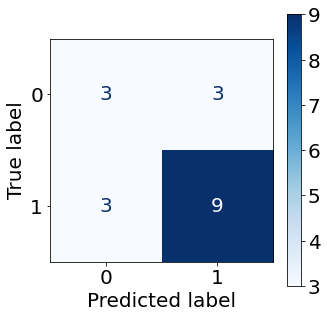

 
precision:  0.75
accuracy:  0.6666666666666666
sensitivity/recall:  0.75
specificity:  0.5
F score:  0.75


In [138]:
classifier = RandomForestClassifier(n_estimators=100, max_depth=5, bootstrap= True, class_weight = 'balanced', criterion= 'gini', min_samples_split = 0.01, random_state=42)
classifier.fit(x_train_r, y_train)

y_pred=classifier.predict(x_test_r)
conf_mat = confusion_matrix(y_test, y_pred, labels=classifier.classes_)

print(' ')
print('-----------------------------------------------------------------------------')
print('-----------------------------------TEST SKUP----------------------------------')    
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=classifier.classes_) 
disp.plot(cmap="Blues", values_format='.5g')
plt.show()
print(' ')
evaluation_classif(conf_mat)

# Logistic regression sa redukcijom

Broj iteracija: 100
Solver: lbfgs
Preciznost je: 0.8946697746697747
Matrica konfuzije:


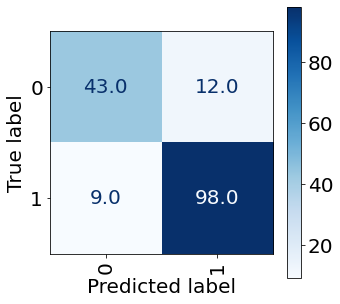

Broj iteracija: 100
Solver: newton-cg
Preciznost je: 0.8946697746697747
Matrica konfuzije:


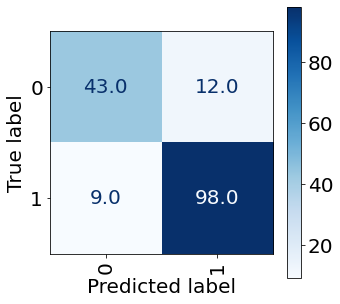

Broj iteracija: 100
Solver: liblinear
Preciznost je: 0.9017210567210568
Matrica konfuzije:


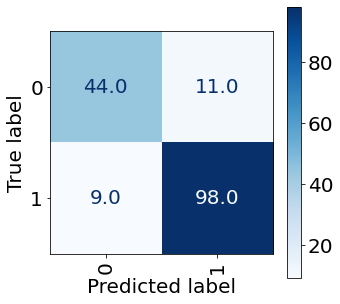

Broj iteracija: 100
Solver: sag
Preciznost je: 0.8946697746697747
Matrica konfuzije:


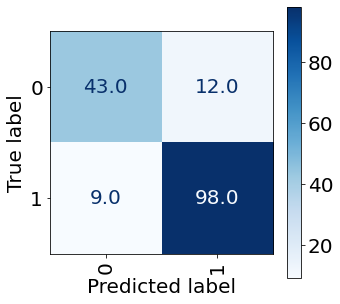

Broj iteracija: 100
Solver: saga
Preciznost je: 0.8946697746697747
Matrica konfuzije:


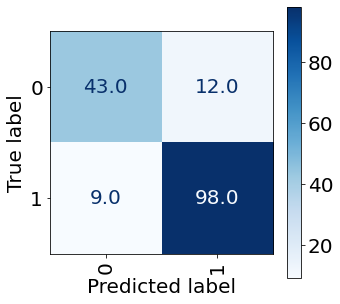

Broj iteracija: 200
Solver: lbfgs
Preciznost je: 0.8946697746697747
Matrica konfuzije:


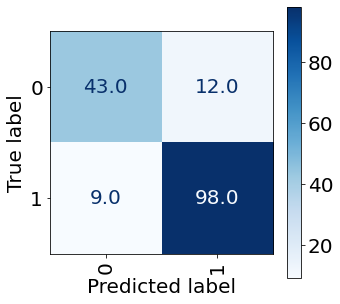

Broj iteracija: 200
Solver: newton-cg
Preciznost je: 0.8946697746697747
Matrica konfuzije:


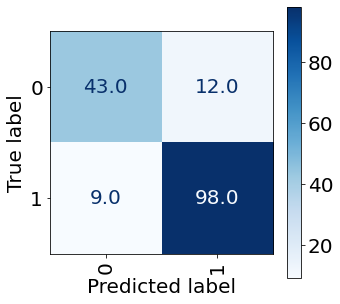

Broj iteracija: 200
Solver: liblinear
Preciznost je: 0.9017210567210568
Matrica konfuzije:


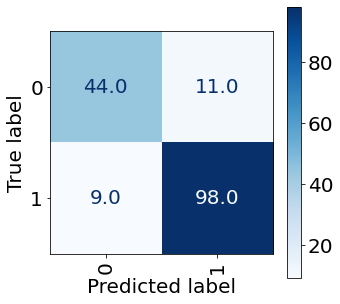

Broj iteracija: 200
Solver: sag
Preciznost je: 0.8946697746697747
Matrica konfuzije:


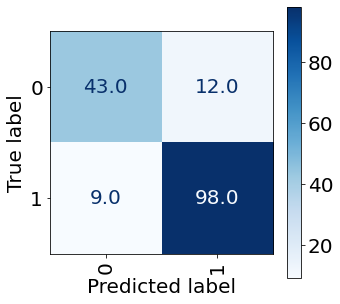

Broj iteracija: 200
Solver: saga
Preciznost je: 0.8946697746697747
Matrica konfuzije:


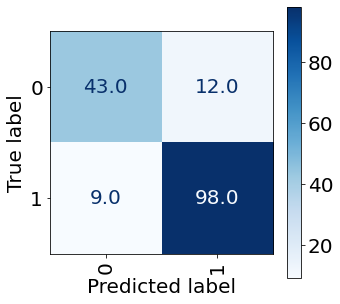

Broj iteracija: 400
Solver: lbfgs
Preciznost je: 0.8946697746697747
Matrica konfuzije:


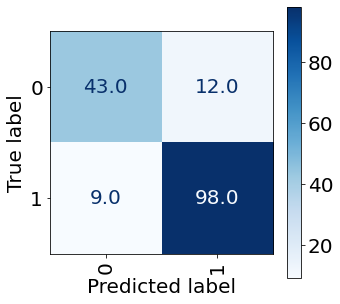

Broj iteracija: 400
Solver: newton-cg
Preciznost je: 0.8946697746697747
Matrica konfuzije:


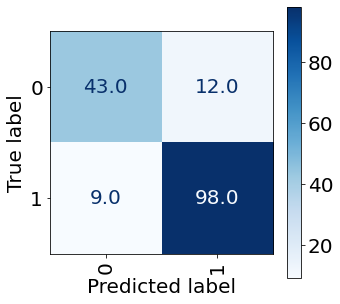

Broj iteracija: 400
Solver: liblinear
Preciznost je: 0.9017210567210568
Matrica konfuzije:


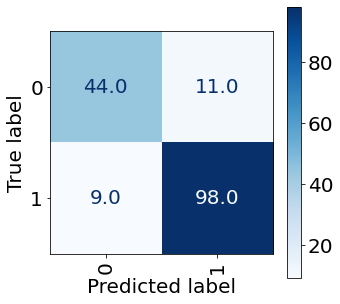

Broj iteracija: 400
Solver: sag
Preciznost je: 0.8946697746697747
Matrica konfuzije:


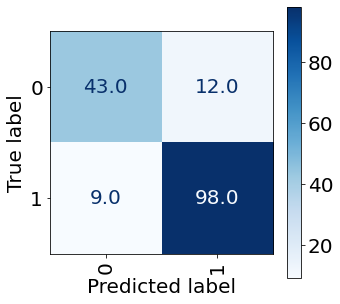

Broj iteracija: 400
Solver: saga
Preciznost je: 0.8946697746697747
Matrica konfuzije:


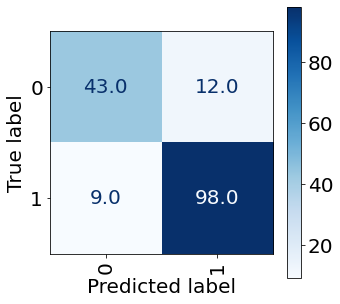

Broj iteracija: 500
Solver: lbfgs
Preciznost je: 0.8946697746697747
Matrica konfuzije:


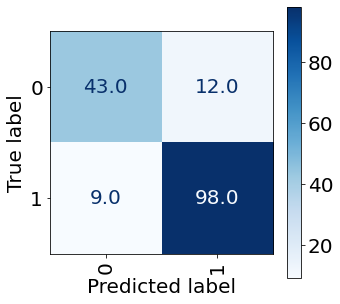

Broj iteracija: 500
Solver: newton-cg
Preciznost je: 0.8946697746697747
Matrica konfuzije:


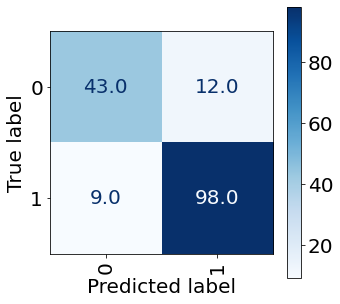

Broj iteracija: 500
Solver: liblinear
Preciznost je: 0.9017210567210568
Matrica konfuzije:


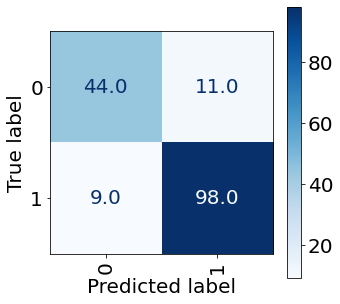

Broj iteracija: 500
Solver: sag
Preciznost je: 0.8946697746697747
Matrica konfuzije:


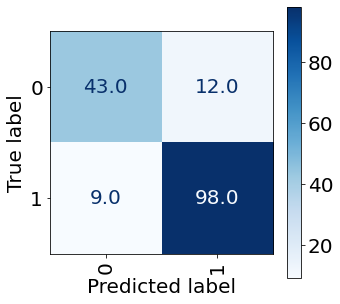

Broj iteracija: 500
Solver: saga
Preciznost je: 0.8946697746697747
Matrica konfuzije:


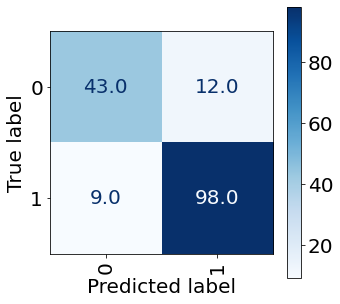

Broj iteracija: 1000
Solver: lbfgs
Preciznost je: 0.8946697746697747
Matrica konfuzije:


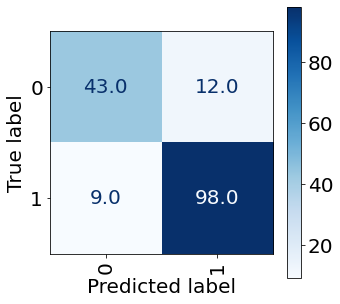

Broj iteracija: 1000
Solver: newton-cg
Preciznost je: 0.8946697746697747
Matrica konfuzije:


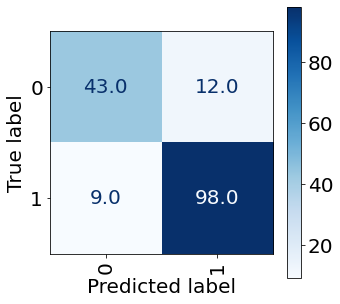

Broj iteracija: 1000
Solver: liblinear
Preciznost je: 0.9017210567210568
Matrica konfuzije:


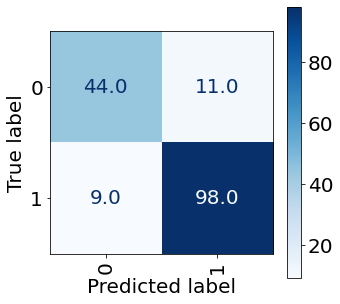

Broj iteracija: 1000
Solver: sag
Preciznost je: 0.8946697746697747
Matrica konfuzije:


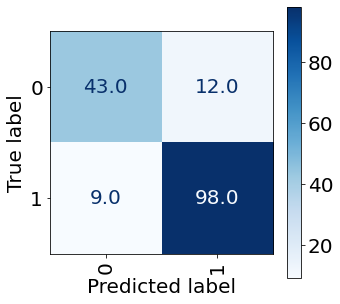

Broj iteracija: 1000
Solver: saga
Preciznost je: 0.8946697746697747
Matrica konfuzije:


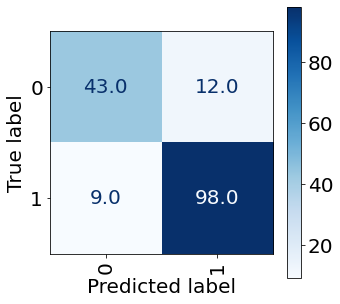

precision:  0.8909090909090909
accuracy:  0.8703703703703703
sensitivity/recall:  0.9158878504672897
specificity:  0.7818181818181819
F score:  0.9032258064516129
--------------------------------

Najbolja preciznost je u iteraciji broj:  2


In [136]:
kf = StratifiedKFold(n_splits=fold_number, shuffle=True, random_state=42)
prec = []
for num in [100, 200, 400, 500, 1000]:
    for solv in ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga']:
        indexes = kf.split(x_train_r, y_train)
        prec_tmp = []
        fin_conf_mat = np.zeros((len(np.unique(y_therapy)),len(np.unique(y_therapy))))
        for train_index, test_index in indexes:
            classifier = LogisticRegression(max_iter = num, solver = solv)
            classifier.fit(x_train_r.iloc[train_index,:],y_train.iloc[train_index])
            y_pred = classifier.predict(x_train_r.iloc[test_index,:])
            prec_tmp.append(precision_score(y_train.iloc[test_index], y_pred))
            fin_conf_mat += confusion_matrix(y_train.iloc[test_index], y_pred, labels=classifier.classes_)
        print('Broj iteracija:', num)
        print('Solver:', solv)
        print('Preciznost je:', np.mean(prec_tmp)) 
        print('Matrica konfuzije:')
        
        plt.rcParams['figure.figsize'] = [5, 5]
        disp = ConfusionMatrixDisplay(confusion_matrix =fin_conf_mat,  display_labels=classifier.classes_)
        disp.plot(cmap="Blues", values_format='', xticks_rotation=90)  
        plt.show()
        prec.append(np.mean(prec_tmp))
        
evaluation_classif(fin_conf_mat)
print('--------------------------------')
print('')    
print('Najbolja preciznost je u iteraciji broj: ', np.argmax(prec))

 
-----------------------------------------------------------------------------
-----------------------------------TEST SKUP----------------------------------


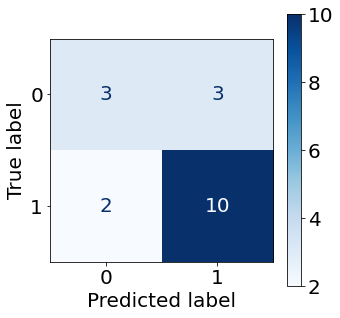

 
precision:  0.7692307692307693
accuracy:  0.7222222222222222
sensitivity/recall:  0.8333333333333334
specificity:  0.5
F score:  0.8


In [139]:
classifier = LogisticRegression(max_iter = 100, solver = 'newton-cg')
classifier.fit(x_train_r, y_train)

y_pred=classifier.predict(x_test_r)
conf_mat = confusion_matrix(y_test, y_pred, labels=classifier.classes_)

print(' ')
print('-----------------------------------------------------------------------------')
print('-----------------------------------TEST SKUP----------------------------------')    
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=classifier.classes_) 
disp.plot(cmap="Blues", values_format='.5g')
plt.show()
print(' ')
evaluation_classif(conf_mat)